<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/section-KP/section1-KP-answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-202M ABC SECTION #1
###### TF: Kelsey Pukelis

**I - INSTRUCTIONS**  

1. **Create a copy of this Jupyter notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!***
    1. Remember to save your work frequently by pressing `command-S` or clicking `File > Save` in the menubar.
    1. We recommend completing this in Google Chrome.

## Part I: regression by hand (and in reverse)

Hint: Note that the following formulas apply:

$\hat \beta_1 = \frac{\Delta Y }{\Delta X}$ (Change in Y divided by Change in X)

$\hat u_i = Y_i - \hat Y_i $ (The residual for each observation)

*Note: You may use R to do the calculations as long as you do not use the built-in regression function. Alternatively, you can calculate them by hand or using Excel.*

**0a. Write the Sample Regression Function for generic variables $X$ and $Y$ (the version without a residual).**

Your Answer Here

#### START

$$
\hat{Y} = \hat{\beta}_0 + \hat{\beta_1} \cdot X
$$

#### END

**0b. Rearrange the equation above to have an equation: $\hat{\beta}_0 = $ ...**

Your Answer Here 

#### START 

$$
\hat{\beta}_0 = \hat{Y} - \hat{\beta}_1 \cdot X
$$

#### END

*Note: You may find it especially helpful for the rest of this exercise to hand-draw a picture.*

Suppose you were given two points on a regression line:

$$
(X_A,\hat{Y}_A) = (2,2)
$$

$$
(X_B,\hat{Y}_B) = (4,3)
$$



**1. Calculate $\hat{\beta}_1$.**

In [ ]:
# Code block for calulations

# START

# Option 1: just using numbers
beta_1_hat_num <- (3-2) / (4-2)
beta_1_hat_num

# Option 2: using objects
X_A <- 2
Y_A_hat <- 2
X_B <- 4
Y_B_hat <- 3

beta_1_hat <- (Y_B_hat - Y_A_hat) / (X_B - X_A)
beta_1_hat

# END

[1] 0.5

[1] 0.5

**2. Calculate $\hat{\beta_0}$.**

In [ ]:
# Code block for calculations

# START 

# Option 1a: just using numbers and the "A" point
beta_0_hat_1a <- 2 - 2 * 0.5
beta_0_hat_1a

# Option 1b: just using numbers and the "B" point
beta_0_hat_1b <- 3 - 4 * 0.5
beta_0_hat_1b

# Option 2a: using objects and the "A" point
beta_0_hat_2a <- Y_A_hat - beta_1_hat * X_A
beta_0_hat_2a

# Option 2b: using objects and the "B" point
beta_0_hat <- Y_B_hat - beta_1_hat * X_B
beta_0_hat
# END

[1] 1

[1] 1

[1] 1

[1] 1

Suppose someone tells you that there is a third observation, where $X_C = 7$ 

**3. Calculate $\hat{Y}_C$.**

In [ ]:
# Code block for calculations

# START
# Option 1: using numbers 
Y_C_hat_num <- 1 + 0.5 * 7
Y_C_hat_num

# Option 2: using objects
X_C <- 7
Y_C_hat <- beta_0_hat + beta_1_hat * X_C
Y_C_hat

# END

[1] 4.5

[1] 4.5

Now suppose someone gives you 3 points from the actual, observed data: 

$$
(X_A,Y_A) = (2,1)
$$
$$
(X_B,Y_B) = (4,5)
$$
$$
(X_C,Y_C) = (7,3.5)
$$


**4. Calculate $\hat{u}_A$, $\hat{u}_B$, and $\hat{u}_C$.**

In [ ]:
# Code block for calculations

# START 
# Option 1: using numbers 
u_A_hat_num <- 1 - 2
u_B_hat_num <- 5 - 3
u_C_hat_num <- 3.5 - 4.5
u_A_hat_num
u_B_hat_num
u_C_hat_num

# Option 2: using objects
Y_A <- 1
Y_B <- 5
Y_C <- 3.5
u_A_hat <- Y_A - Y_A_hat
u_B_hat <- Y_B - Y_B_hat
u_C_hat <- Y_C - Y_C_hat
u_A_hat
u_B_hat
u_C_hat

# END 

[1] -1

[1] 2

[1] -1

[1] -1

[1] 2

[1] -1

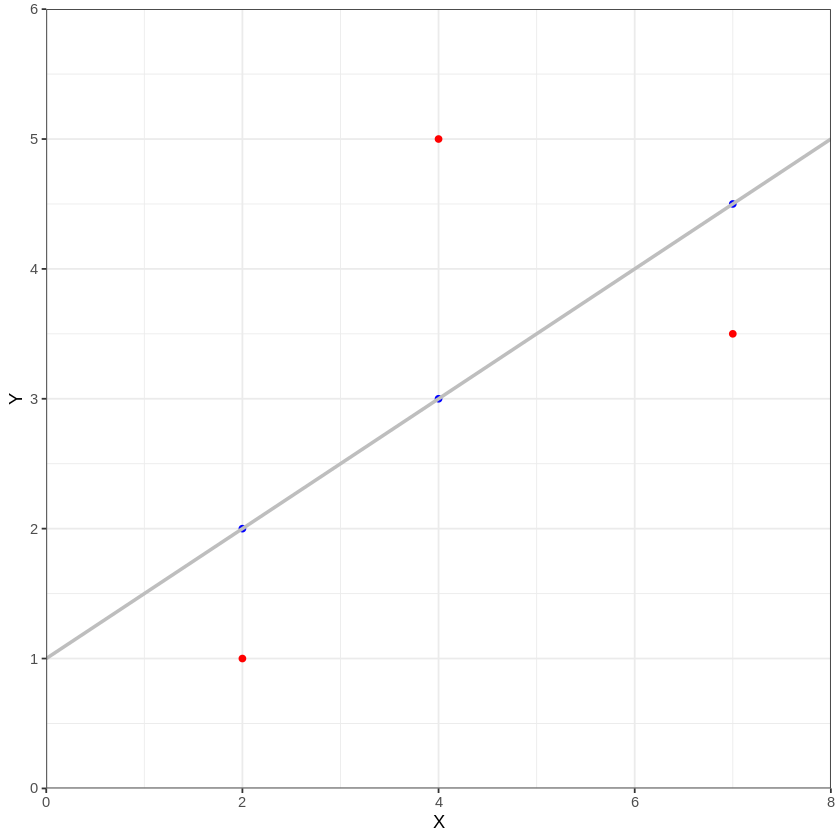

In [ ]:
# START 

# Here is the kind of picture you should have drawn.

X <- c(2,4,7)
Y <- c(1,5,3.5)
Y_hat <- c(2,3,4.5)
  
data <- data.frame(X,Y,Y_hat)
#head(data)

library(ggplot2)

# Note: By the end of this section / problem set 1, you should be able to create this graph in R.
# the next four lines are essential to creating this graph
ggplot(data = data) + 
  geom_point(aes(x = X,y = Y),color = "red") + 
    geom_point(aes(x = X,y = Y_hat),color = "blue") + 
      geom_smooth(aes(x = X,y = Y_hat),method = "lm",se = FALSE,formula = y ~ x,color = "gray",fullrange = TRUE) +
        # the rest is to help with formatting
      scale_x_continuous(limits = c(0,8), expand = c(0,0)) + 
        scale_y_continuous(limits = c(0,6), expand = c(0,0)) + 
        theme_bw()

# END

## Part II: Data exercise

For this problem, we will be looking at data you may have seen before on income mobility in the U.S. 

For more information, see the paper ["The Opportunity Atlas: Mapping the Childhood Roots of Social Mobility"](https://opportunityinsights.org/paper/the-opportunity-atlas/) by Raj Chetty, Nathaniel Hendren, John Friedman, Maggie R. Jones, and Sonya R. Porter. (Looking at this resource is not necessary for completing the problem, but you may find it interesting or helpful for articulating interpretations.)

In particular, we will be working to replicate Figure I, Panel B in this [academic paper](https://opportunityinsights.org/wp-content/uploads/2018/10/atlas_paper.pdf). (The numbers will be slightly different because we are plotting for all genders, not just men.)

## Load `R` libraries and data

**Please refer to Sheet 1 in this [R Cheat Sheet](https://bit.ly/HKS-R) which includes the commands you learned last semester in addition to a number of additional ones.**

The code cell below imports the R tidyverse and creates a dataframe that we will be using for the next exercise. Make sure to run it before starting the problem!

*Note: Click the "play" button that appears when you hover over a cell to run it. The first time you do this you may receive an alert that this notebook was not authored by Google. If so, click "Run anyway" to proceed.*

In [ ]:
#suppress warnings
options(warn = -1,dplyr.summarise.inform=FALSE)

#load packages
library(tidyverse)
library(broom)
library(ggplot2)

# load data
mobility_all <- read.csv('https://opportunityinsights.org/wp-content/uploads/2018/10/national_percentile_outcomes.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.1      

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# run this to select only the variables in the data we will be working with
mobility <- mobility_all %>% 
  select(par_pctile,(starts_with("jail") & ends_with("_pooled")))

Here is a description of each variable in our shortened dataset:

*   ``par_pctile``: Parent Income Rank in National Income Distribution. 
*   ``jail_pooled_pooled``: Fraction incarcerated on April 1st, 2010 (where incarceration is defined as residing in a federal detention center, federal prison, state prison, local jail, residential correctional facility, military jail, or juvenile correctional facility). The first "pooled" label means the data represents all races. The second "pooled" label means because the data represents all genders.
*   ``jail_[race]_pooled``: Fraction incarcerated on April 1st, 2010 for that race/ethnicity group. (Like above, the last "pooled" means these data represents all genders.)

(Here is the  [codebook](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-7.pdf) for the full data, if you're curious.)

In [ ]:
# take a look at the first few observations of the data
head(mobility)

,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.05587,0.004098,0.10430,0.03499,0.07073,0.02007,0.03733
2,2,0.05033,0.003936,0.09618,0.03290,0.05996,0.01597,0.03464
3,3,0.04627,0.004104,0.08644,0.02931,0.06418,0.01906,0.03460
4,4,0.04445,0.004954,0.08586,0.02776,0.05662,0.01667,0.03246
5,5,0.04172,0.004271,0.08046,0.02634,0.04995,0.01573,0.03146
6,6,0.04048,0.003178,0.08032,0.02490,0.05258,0.01598,0.02974



**Let's start out with familiarizing ourselves with the interpretation of the variable for Parent Income Rank** (``par_pctile``).

A. A rank of 1 mean means that a parent was **very poor**. In particular, they were in the lowest percentile of the national income distribution.

B. A rank of 99 mean means that a parent was **very rich**. In particular, they were in the highest percentile of the national income distribution.

C. A rank of 50 mean means that a parent was **in the middle** of the national income distribution. In particular, they were at the median.

**Convert the ``jail_`` variables from fractions to percents, to ease interpretations.**

In [ ]:
mobility_pct <- mobility %>% 
  mutate(jail_pooled_pooled = jail_pooled_pooled*100) %>% 
  mutate(jail_asian_pooled = jail_asian_pooled*100) %>% 
  mutate(jail_black_pooled = jail_black_pooled*100) %>% 
  mutate(jail_hisp_pooled = jail_hisp_pooled*100) %>% 
  mutate(jail_natam_pooled = jail_natam_pooled*100) %>% 
  mutate(jail_other_pooled = jail_other_pooled*100) %>% 
  mutate(jail_white_pooled = jail_white_pooled*100)
head(mobility_pct)

,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5.587,0.4098,10.430,3.499,7.073,2.007,3.733
2,2,5.033,0.3936,9.618,3.290,5.996,1.597,3.464
3,3,4.627,0.4104,8.644,2.931,6.418,1.906,3.460
4,4,4.445,0.4954,8.586,2.776,5.662,1.667,3.246
5,5,4.172,0.4271,8.046,2.634,4.995,1.573,3.146
6,6,4.048,0.3178,8.032,2.490,5.258,1.598,2.974


## All races

**1. Create a scatter plot showing the relationship between incarceration rates and parent income rank for the whole sample (all races and genders).**

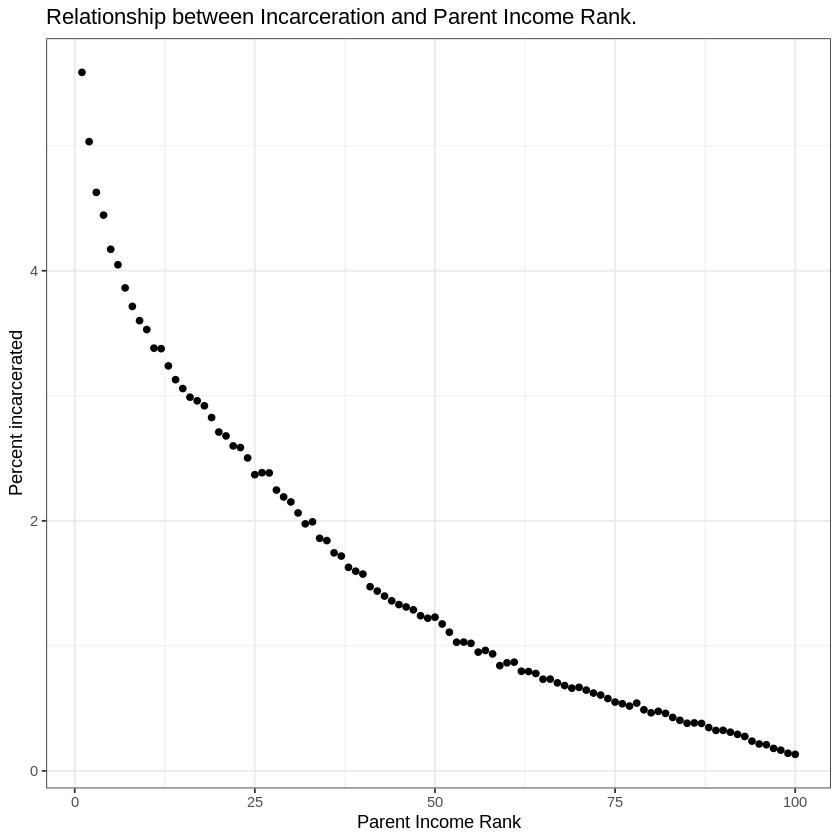

In [ ]:
# Your Answer Here

# START

# scatter plot
# the next two lines of code are essential for creating the bare-bones plot
base_plot <- mobility_pct %>% 
  ggplot(aes(x = par_pctile,y = jail_pooled_pooled)) + geom_point() +
  # the rest of this is just labeling and formatting to make things look nice
  ggtitle("Relationship between Incarceration and Parent Income Rank.") +
  xlab("Parent Income Rank") +
  ylab("Percent incarcerated") +
  theme_bw()
base_plot
# END

**2. Comment on this "scatter" plot. For example, you might consider whether the relationship appears linear, whether this looks like a "scatter" plot, and on the correlation of these variables. What is your takeaway about the relationship between parental income and incarceration rates?**

#### START

The relationship between these two variables is negative: children from poor families are incarcerated at higher rates as adults compared to children from rich families. The "scatter" plot is quite streamlined and not very "scattered." In fact, the relationship looks very quadratic or logarithmic. 

Aside: The reason for this striking, clear relationship is because the data is very rich (it is a summary of all families who file taxes in the U.S.) AND the relationship between these variables is very strong/robust. We will discuss non-linear regression later in the course. 

#### END

**3. Overlay a linear regression line to your plot. Comment on the fit of this regression line to the data.**


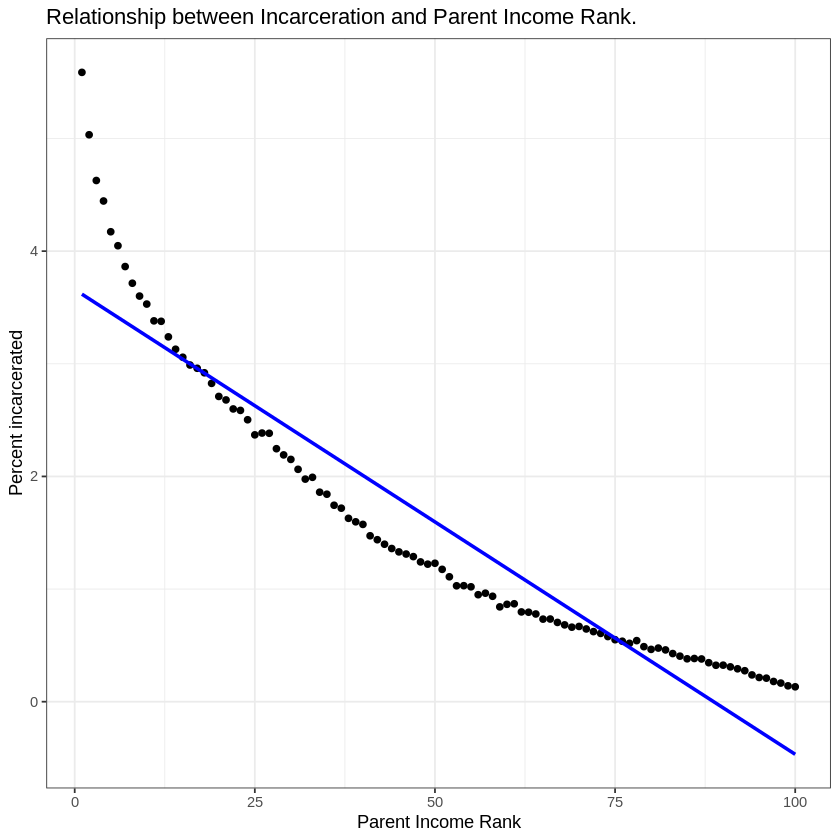

In [ ]:
# Your Answer Here

# START 
base_plot + 
  geom_smooth(method = "lm", se = F, formula = y ~ x,color = "blue") 
# END

#### START

The linear regression line fits the data decently well. It is quite clear that the real relationship is between the variables is non-linear, but the linear model does a decent job at describing the negative relationship between the two variables. 

*Note: You could have said either "well" or "not well", so long as you justify your response. *

We will discuss non-linear regression later in the course. One way to tell that the true relationship between the variables is non-linear is that there is a **systematic** change in the sign of the residuals: for low values of X, the residuals are positive; for middle values of X, the residuals are negative, and for high vlues of X, the residuals are positive again. In constrast, if the linear fit was good, the data points would look "randomly" scattered around the regression line, correponding to "random" error. 

#### END

**4. Run a linear regression of incarceration rate on parental income rank. Interpret the coefficients and comment on their statistical significance.**

In [ ]:
# Your Answer Here

# START 

lm_all <- lm(jail_pooled_pooled ~ par_pctile,data = mobility_pct)
summary(lm_all)
# END


Call:
lm(formula = jail_pooled_pooled ~ par_pctile, data = mobility_pct)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4944 -0.3486 -0.1082  0.2401  1.9691 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.659181   0.088678   41.26   <2e-16 ***
par_pctile  -0.041263   0.001525  -27.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4401 on 98 degrees of freedom
Multiple R-squared:  0.882,	Adjusted R-squared:  0.8808 
F-statistic: 732.6 on 1 and 98 DF,  p-value: < 2.2e-16


#### START 

Intercept: The regression estimates that 3.66 percent of children with the very poorest parents end up incarcerated as adults. 

Slope: Increasing the parental income rank by 1 is associated with a 0.04 percentage point decrease in the likelihood that a child ends up incarcerated as an adult. 

Alternatively, increasing the parental income rank by 10 is associated with a 0.4 percentage point decrease in the likelihood that a child ends up incarcerated as an adult.

Both coefficients are highly statistically significant. We can tell this because the p-values for both coefficients are very small (p < 2e-16 = 2 * 10^-16 = 0.0000000000000002). We should have expected this because there is a clear, negative relationship between these two variables as shown in the plot.

#### END

**5. Divide the sample into "rich" and "poor" families by defining your own cutoff point. (Note: solutions will use the median, where the "rich" group includes the median.) Estimate two regressions of incarceration rates on parental income rank separately: one regression for "poor" and one regression for "rich" children. How do the coefficients differ between the two groups?**

In [ ]:
# Your Answer Here

# START

# create variable indicating "poor" families
# 50 is the median
mobility_pct <- mobility_pct %>% mutate(poor = (par_pctile < 50))

# regression for "poor" families
lm_poor <- mobility_pct %>% 
  filter(poor == TRUE) %>%
  lm(jail_pooled_pooled ~ par_pctile, data = .)
  
# regression for "rich" families
lm_rich <- mobility_pct %>% 
  filter(poor == FALSE) %>%
  lm(jail_pooled_pooled ~ par_pctile, data = .)

# display results
summary(lm_poor)
summary(lm_rich)

# END



Call:
lm(formula = jail_pooled_pooled ~ par_pctile, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27202 -0.16982 -0.08299  0.07822  1.23827 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.421633   0.082394   53.66   <2e-16 ***
par_pctile  -0.072901   0.002869  -25.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.284 on 47 degrees of freedom
Multiple R-squared:  0.9322,	Adjusted R-squared:  0.9307 
F-statistic: 645.9 on 1 and 47 DF,  p-value: < 2.2e-16



Call:
lm(formula = jail_pooled_pooled ~ par_pctile, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062354 -0.028938  0.004095  0.020914  0.149026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.0561967  0.0292264   70.35   <2e-16 ***
par_pctile  -0.0195245  0.0003824  -51.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0402 on 49 degrees of freedom
Multiple R-squared:  0.9816,	Adjusted R-squared:  0.9812 
F-statistic:  2607 on 1 and 49 DF,  p-value: < 2.2e-16


#### START

All coefficients are statistically significant. Especially noteworthy, in terms of magnitudes, is that the slope coefficient is much larger (more negative) for poor families compared to rich families (-0.0729 versus -0.0195). 

#### END

**Bonus: plot the points and two regression lines separately by the variable indicating "poor" or "rich" families that you just created.**

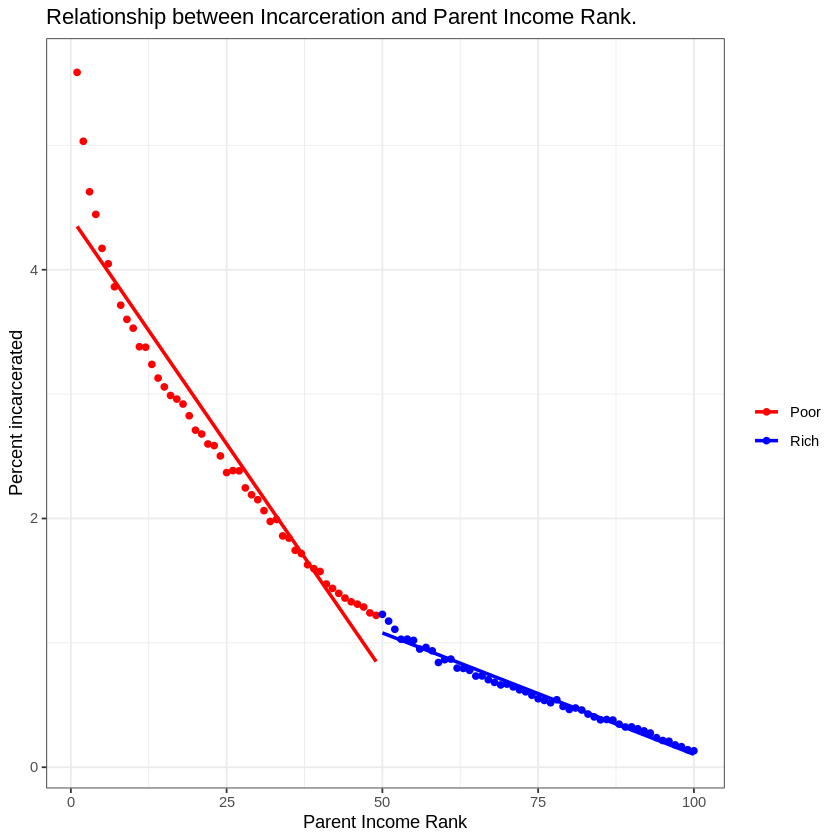

In [ ]:
# Your Answer Here

# START
mobility_pct %>% 
  # the next three lines are essential to creating the plot
  ggplot(aes(x = par_pctile, y = jail_pooled_pooled,group = poor,color = poor)) + 
    geom_point() + 
    geom_smooth(method = "lm",se = F,formula = y~x) + 
      # this code makes the legend look nice and sets the colors
      scale_color_manual( name = "",
                          breaks = c("TRUE","FALSE"),
                          values = c("red","blue"),
                          labels = c("Poor","Rich")) +
  # this code is for labeling and formatting
  ggtitle("Relationship between Incarceration and Parent Income Rank.") +
  xlab("Parent Income Rank") +
  ylab("Percent incarcerated") +
  theme_bw()

# END

## By race

**6. Now plot the relationship between incarceration rates and parental income rank for at least two race/ethnicity groups of your choosing. (Note: The solutions will include all race/ethnicity groups.)**

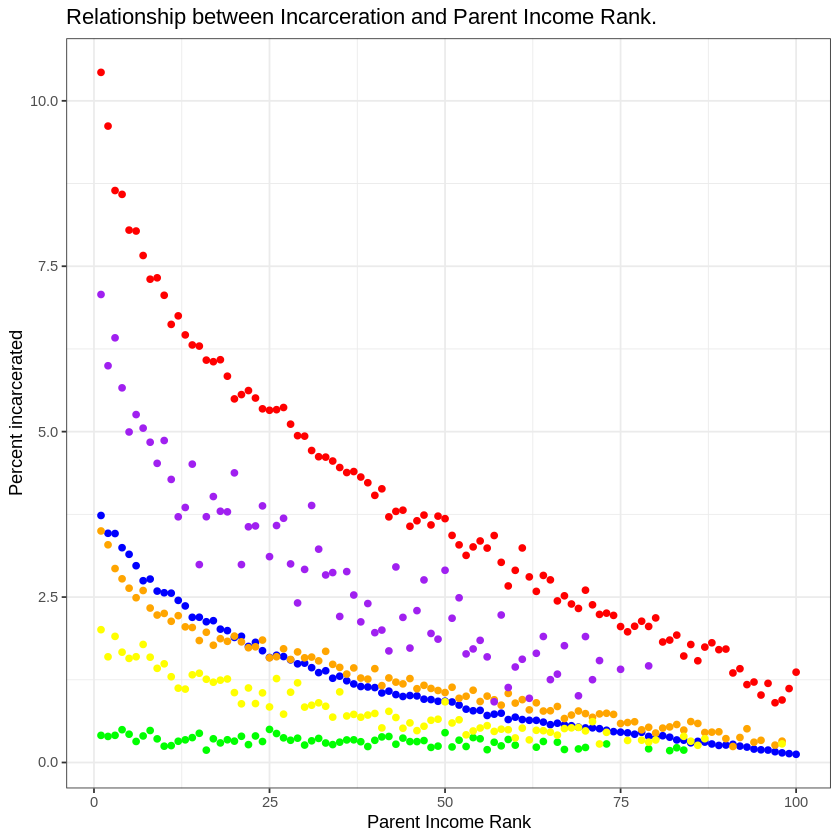

In [ ]:
# Your Answer Here

# START

# scatter plot
mobility_pct %>% 
  ggplot(aes(x = par_pctile)) + 
  geom_point(aes(y = jail_white_pooled),color = "blue") +
  geom_point(aes(y = jail_black_pooled),color = "red") +
  geom_point(aes(y = jail_hisp_pooled),color = "orange") +
  geom_point(aes(y = jail_asian_pooled),color = "green") +
  geom_point(aes(y = jail_natam_pooled),color = "purple") +
  geom_point(aes(y = jail_other_pooled),color = "yellow") +
  ggtitle("Relationship between Incarceration and Parent Income Rank.") +
  xlab("Parent Income Rank") +
  ylab("Percent incarcerated") +
  theme_bw() 

# END

par_pctile,jail_race_pooled,jail_pooled,race
<int>,<chr>,<dbl>,<chr>
1,jail_pooled_pooled,5.5870,pooled
1,jail_asian_pooled,0.4098,asian
1,jail_black_pooled,10.4300,black
1,jail_hisp_pooled,3.4990,hisp
1,jail_natam_pooled,7.0730,natam
1,jail_other_pooled,2.0070,other


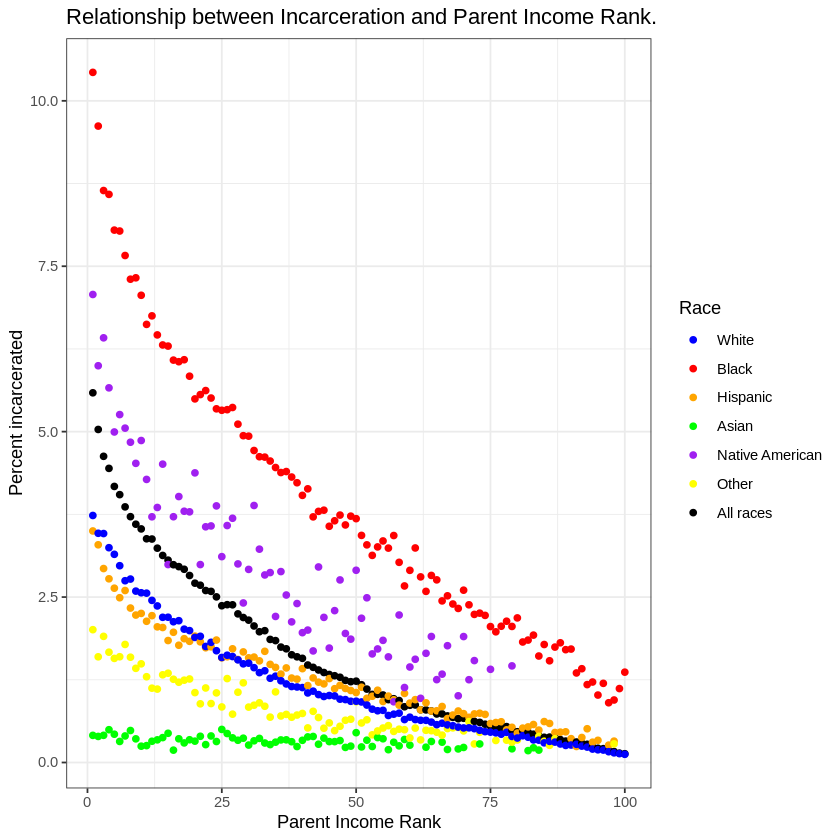

In [ ]:
# START

# more streamlined way to plot, to see the legend

# Reshaping the data first
mobility_long <- pivot_longer(mobility_pct, starts_with("jail_"),names_to = "jail_race_pooled", values_to = "jail_pooled")
mobility_long <- mobility_long %>% mutate(race = str_remove(str_remove(jail_race_pooled,"jail_"),"_pooled"))
head(mobility_long)

# scatter plot
mobility_long %>% 
  ggplot(aes(x = par_pctile,y = jail_pooled,color = race)) + 
  geom_point() +
  scale_color_manual( name = "Race",
                      values = c("blue","red","orange","green","purple","yellow","black"),
                      breaks = c("white","black","hisp","asian","natam","other","pooled"),
                      labels = c("White","Black","Hispanic","Asian","Native American","Other","All races")) +
  ggtitle("Relationship between Incarceration and Parent Income Rank.") +
  xlab("Parent Income Rank") +
  ylab("Percent incarcerated") +
  theme_bw() 

# END

**7. Comment on the results of this graph.**

#### START

The ranking of intercepts from highest to lowest is: Black, Native American, White, Hispanic, Other, and Asian. This looks to be the same as the ranking of intercepts. 

This shows that, above all other groups, the (negative) relationship between incarceration rates and parental income is strongest for Blacks compared to any other racial group. 

Assuming this relationship were causal, this would suggest that increasing a Black parent's income rank would decrease incarceration rates for their children the most compared to other race/ethnicity groups. 

Note that interpreting this casually is already a little strange because increasing one parent's income rank means decreasing another's rank. Income rank is a *relative* measure of income, as opposed to total income or percent of the poverty line, which is an *absolute* measure of income. 

One reason this relationship might not be causal is if there were some other factor--like discrimination--which led to both higher incarceration rates and lower income ranks. We would call this a "confounding" variable. 

#### END 